In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import DateFormatter

In [3]:
data_file_demand87 = "/workspaces/planning-the-european-electric-system-europe2/data/ERAA_2023-2/demand/cy_stress-test/demand_2025_germany.csv"
df_demand1 = pd.read_csv(data_file_demand87,sep=";",index_col=1)
df_demand1["value"] = df_demand1["value"]/1000
data_file_demand03 = "/workspaces/planning-the-european-electric-system-europe2/data/ERAA_2023-2/demand/demand_2025_germany.csv"
df_demand2 = pd.read_csv(data_file_demand03,sep=";",index_col=1)
df_demand2["value"] = df_demand2["value"]/1000
df_demand2.head(5)

,climatic_year,value
date,,
1900-01-01 00:00:00,2016,47.316
1900-01-01 01:00:00,2016,46.010
1900-01-01 02:00:00,2016,45.693
1900-01-01 03:00:00,2016,46.008
1900-01-01 04:00:00,2016,46.565


In [ ]:
df_demand87 = df_demand1[df_demand1["climatic_year"]==1987]
df_demand03 = df_demand2[df_demand2["climatic_year"]==2003]
df_demand2["climatic_year"].unique()

array([2016, 2003, 1989, 2010, 1996, 1982])

In [ ]:
df_other = df_demand2[df_demand2["climatic_year"]!=2003]
df_average = df_other.groupby(by="date")["value"].mean()

df_average = pd.DataFrame(df_average)
df_average["std"] = df_other.groupby(by="date")["value"].std() 
df_average["borne +"] = df_average["value"]+df_average["std"]
df_average["borne -"] = df_average["value"]-df_average["std"]

,value,std,borne +,borne -
date,,,,
1900-01-01 00:00:00,48.1288,2.070688,50.199488,46.058112
1900-01-01 01:00:00,45.8540,1.509073,47.363073,44.344927
1900-01-01 02:00:00,45.4486,1.457969,46.906569,43.990631
1900-01-01 03:00:00,45.6916,1.362666,47.054266,44.328934
1900-01-01 04:00:00,46.2462,1.293098,47.539298,44.953102
...,...,...,...,...
1900-12-31 19:00:00,63.5218,4.094264,67.616064,59.427536
1900-12-31 20:00:00,61.4888,4.266118,65.754918,57.222682
1900-12-31 21:00:00,60.5866,4.717885,65.304485,55.868715


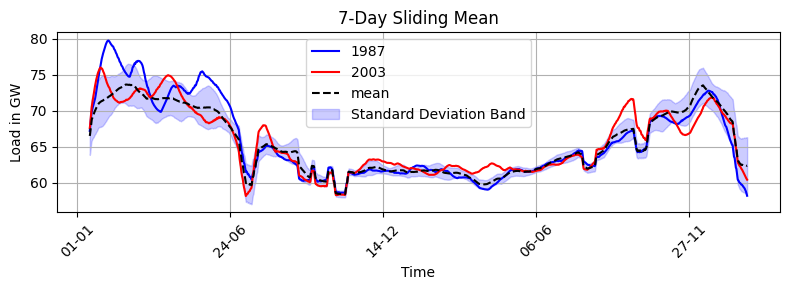

In [29]:
# Plot with the specified requirements
plt.figure(figsize=(8, 3))
df_demand87["value"].rolling(window=24*7).mean().plot(label="1987", color="blue")
df_demand03["value"].rolling(window=24*7).mean().reset_index(level=0, drop=True).plot(label="2003", color="red")
df_average["value"].rolling(window=24*7).mean().reset_index(level=0, drop=True).plot(label="mean", color="black",linestyle="--")
# Adding labels and title
plt.title("7-Day Sliding Mean")
plt.xlabel("Time")
plt.ylabel("Load in GW")
plt.fill_between(
    df_demand87.index,
    df_average["borne -"].rolling(window=24*7).mean().reset_index(level=0, drop=True),
    df_average["borne +"].rolling(window=24*7).mean().reset_index(level=0, drop=True),
    color="blue",
    alpha=0.2,
    label="Standard Deviation Band",
)

# Format x-axis to show only day and month
date_format = DateFormatter("%d-%m")  # Day-Month format
plt.gca().xaxis.set_major_formatter(date_format)
# Rotating x-axis labels
plt.xticks(rotation=45)

# Adding grid and legend
plt.grid()
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [9]:
capa_factor_solar_file = "/workspaces/planning-the-european-electric-system-europe2/data/ERAA_2023-2/res_capa-factors/capa_factor_lfsolarpv_2025_germany.csv"
df_capa_factor_solar = pd.read_csv(capa_factor_solar_file,sep=";",index_col=1)
capa_factor_wind_on_file = "/workspaces/planning-the-european-electric-system-europe2/data/ERAA_2023-2/res_capa-factors/capa_factor_wind_onshore_2025_germany.csv"
df_capa_factor_wind_on = pd.read_csv(capa_factor_wind_on_file,sep=";",index_col=1)
capa_factor_wind_off_file = "/workspaces/planning-the-european-electric-system-europe2/data/ERAA_2023-2/res_capa-factors/capa_factor_wind_offshore_2025_germany.csv"
df_capa_factor_wind_off = pd.read_csv(capa_factor_wind_off_file,sep=";",index_col=1)

In [14]:
capa_factor_solar_file1 = "/workspaces/planning-the-european-electric-system-europe2/data/ERAA_2023-2/res_capa-factors/cy_stress-test/capa_factor_lfsolarpv_2025_germany.csv"
df_capa_factor_solar87 = pd.read_csv(capa_factor_solar_file1,sep=";",index_col=1)
capa_factor_wind_on_file1 = "/workspaces/planning-the-european-electric-system-europe2/data/ERAA_2023-2/res_capa-factors/cy_stress-test/capa_factor_wind_onshore_2025_germany.csv"
df_capa_factor_wind_on87 = pd.read_csv(capa_factor_wind_on_file1,sep=";",index_col=1)
capa_factor_wind_off_file1 = "/workspaces/planning-the-european-electric-system-europe2/data/ERAA_2023-2/res_capa-factors/cy_stress-test/capa_factor_wind_offshore_2025_germany.csv"
df_capa_factor_wind_off87 = pd.read_csv(capa_factor_wind_off_file1,sep=";",index_col=1)

In [15]:
#Capa Renewables
capa_solar = 88447.85
capa_wind_on = 69017.40
capa_wind_off = 11105.00

prod_ENR = df_capa_factor_solar.copy()
prod_ENR["value"] = df_capa_factor_solar["value"]*capa_solar + df_capa_factor_wind_on["value"]*capa_wind_on + df_capa_factor_wind_off["value"]*capa_wind_off
prod_ENR["value"] = prod_ENR["value"]/1000
prod_ENR_03 = prod_ENR[prod_ENR["climatic_year"]==2003]

prod_ENR87 = df_capa_factor_solar87.copy()
prod_ENR87["value"] = df_capa_factor_solar87["value"]*capa_solar + df_capa_factor_wind_on87["value"]*capa_wind_on + df_capa_factor_wind_off87["value"]*capa_wind_off
prod_ENR87["value"] = prod_ENR87["value"]/1000
prod_ENR_87 = prod_ENR87[prod_ENR87["climatic_year"]==1987]


In [22]:
df_other = prod_ENR[prod_ENR["climatic_year"]!=2003]
df_prod_average = df_other.groupby(by="date")["value"].mean()

df_prod_average = pd.DataFrame(df_prod_average)
df_prod_average["std"] = df_other.groupby(by="date")["value"].std() 
df_prod_average["borne +"] = df_prod_average["value"]+df_prod_average["std"]
df_prod_average["borne -"] = df_prod_average["value"]-df_prod_average["std"]
df_prod_average

,value,std,borne +,borne -
date,,,,
1900-01-01 00:00:00,19.863612,4.196449,24.060061,15.667163
1900-01-01 01:00:00,19.479980,3.715443,23.195423,15.764537
1900-01-01 02:00:00,19.336237,3.132008,22.468245,16.204229
1900-01-01 03:00:00,18.758111,2.567111,21.325223,16.191000
1900-01-01 04:00:00,17.889635,2.404040,20.293675,15.485595
...,...,...,...,...
1900-12-31 19:00:00,20.012788,10.572325,30.585113,9.440463
1900-12-31 20:00:00,20.744684,10.967787,31.712471,9.776897
1900-12-31 21:00:00,21.567807,11.730672,33.298478,9.837135


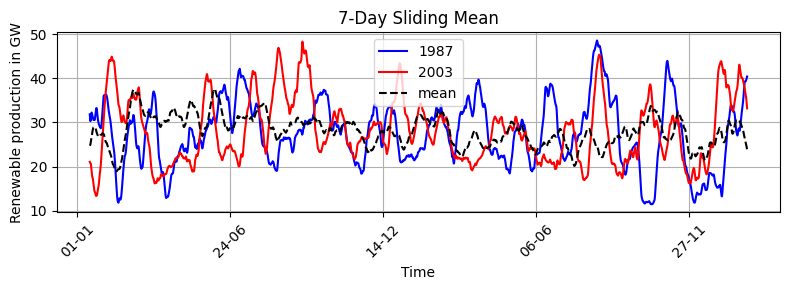

In [27]:
# Plot with the specified requirements
plt.figure(figsize=(8, 3))
prod_ENR_87["value"].rolling(window=24*7).mean().reset_index(level=0, drop=True).plot(label="1987", color="blue")
prod_ENR_03["value"].rolling(window=24*7).mean().reset_index(level=0, drop=True).plot(label="2003", color="red")
df_prod_average["value"].rolling(window=24*7).mean().reset_index(level=0, drop=True).plot(label="mean", color="black",linestyle="--")
# Adding labels and title
plt.title("7-Day Sliding Mean")
plt.xlabel("Time")
plt.ylabel("Renewable production in GW")
# plt.fill_between(
#     df_prod_average.index,
#     df_prod_average["borne -"].rolling(window=24*7).mean().reset_index(level=0, drop=True),
#     df_prod_average["borne +"].rolling(window=24*7).mean().reset_index(level=0, drop=True),
#     color="blue",
#     alpha=0.2,
#     label="Standard Deviation Band",
# )

# Adding labels and title
plt.title("7-Day Sliding Mean")
plt.xlabel("Time")
plt.ylabel("Renewable production in GW")

# Format x-axis to show only day and month
date_format = DateFormatter("%d-%m")  # Day-Month format
plt.gca().xaxis.set_major_formatter(date_format)

# Rotating x-axis labels
plt.xticks(rotation=45)

# Adding grid and legend
plt.grid()
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [28]:
res_demand03 = df_demand03-prod_ENR_03
res_demand87 = df_demand87-prod_ENR_87
res_demand_average = df_average-df_prod_average



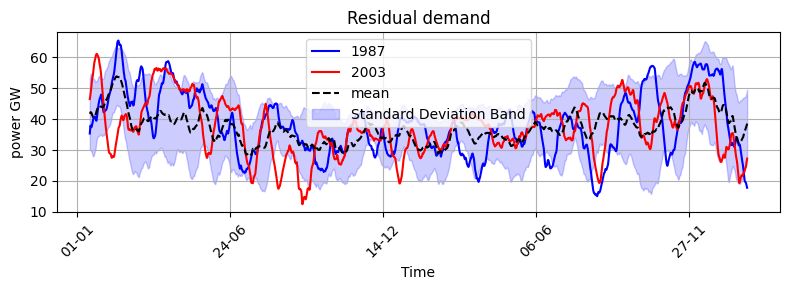

In [31]:
# Plot with the specified requirements
plt.figure(figsize=(8, 3))
res_demand87["value"].rolling(window=24*7).mean().plot(label="1987", color="blue")
res_demand03["value"].rolling(window=24*7).mean().reset_index(level=0, drop=True).plot(label="2003", color="red")
res_demand_average["value"].rolling(window=24*7).mean().reset_index(level=0, drop=True).plot(label="mean", color="black",linestyle="--")
# Adding labels and title
plt.title("Residual demand")
plt.xlabel("Time")
plt.ylabel("power GW")
plt.fill_between(
    res_demand87.index,
    res_demand_average["borne -"].rolling(window=24*7).mean().reset_index(level=0, drop=True),
    res_demand_average["borne +"].rolling(window=24*7).mean().reset_index(level=0, drop=True),
    color="blue",
    alpha=0.2,
    label="Standard Deviation Band",
)

# Format x-axis to show only day and month
date_format = DateFormatter("%d-%m")  # Day-Month format
plt.gca().xaxis.set_major_formatter(date_format)
# Rotating x-axis labels
plt.xticks(rotation=45)

# Adding grid and legend
plt.grid()
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

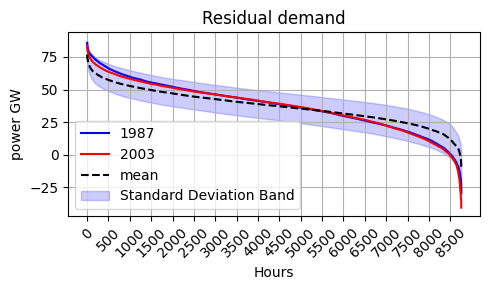

In [45]:
# Plot with the specified requirements
plt.figure(figsize=(5, 3))
res_demand87["value"].sort_values(ascending=False).plot(label="1987", color="blue")
res_demand03["value"].sort_values(ascending=False).reset_index(level=0, drop=True).plot(label="2003", color="red")
res_demand_average["value"].sort_values(ascending=False).reset_index(level=0, drop=True).plot(label="mean", color="black",linestyle="--")
# Adding labels and title
plt.title("Residual demand")
plt.xlabel("Hours")
plt.ylabel("power GW")
plt.fill_between(
    res_demand87["value"].sort_values(ascending=False).index,
    res_demand_average["borne -"].sort_values(ascending=False).reset_index(level=0, drop=True),
    res_demand_average["borne +"].sort_values(ascending=False).reset_index(level=0, drop=True),
    color="blue",
    alpha=0.2,
    label="Standard Deviation Band",
)
# Define custom tick locations (e.g., every 500 hours)
ticks = range(0, 8761, 500)

# Convert tick values to readable labels (e.g., hours as days or custom labels)

# Set the custom tick labels on the x-axis
plt.xticks(ticks,ticks)
plt.xticks(rotation=45)
# Adding grid and legend
plt.grid()
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()